```python
from pandas import CategoricalDtype, read_csv, DataFrame
import pandas as pd
from math import floor, log10
from tensorflow.data import Dataset, AUTOTUNE
from pathlib import Path
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
import tensorflow as tf
from matplotlib.pyplot import figure, axis, imshow, show

_1 = 'DEFEAT', 'DRAW', 'VICTORY'
_2 = {'TEAM': 'uint8', 'ROLE': CategoricalDtype(('TANK', 'DAMAGE', 'SUPPORT')), 'E': 'uint8', 'A': 'uint8',
      'D': 'uint8', 'DMG': 'uint16', 'H': 'uint16', 'MIT': 'uint16'}
_3 = pd.concat((read_csv(f'ROLE/{_4}.csv', index_col=0, dtype=_2) for _4 in _1), keys=_1, names=('RESULT',))
_3.dropna(inplace=True)
_5 = 1, 2
_6 = ('TANK', 1), ('DAMAGE', 2), ('SUPPORT', 2)
_7 = [_8 for _8 in _2 if _8 not in {'TEAM', 'ROLE'}]


def _9(_10):
    _11 = {_12: [] for _12 in _2}
    for _13 in _5:
        _14 = _10[_10['TEAM'] == _13]
        for _15, _16 in _6:
            for _ in range(_16 - sum(_14['ROLE'] == _15)):
                _11['TEAM'].append(_13)
                _11['ROLE'].append(_15)
                for _17 in _7:
                    _11[_17].append(0)
    return DataFrame(_11).astype(_2)


_18 = pd.concat([_3, _3.groupby(level=(0, 1), group_keys=True).apply(_9)])
_18.sort_values(['RESULT', 'INDEX', 'TEAM', 'ROLE'], inplace=True)
_19 = DataFrame()
_19['TEAM'] = _18['TEAM'] - 1
_19['ROLE'] = _18['ROLE'].cat.codes.astype('uint8')
for _20 in _7:
    for _21 in range(floor(log10(_18[_20].max())), -1, -1):
        _19[f'{_20}{_21}'] = (_18[_20] // 10 ** _21 % 10).astype('uint8')
_23 = tuple(_19.to_numpy().reshape(-1, 230).T)


def _24(_25, _26):
    _27 = decode_png(read_file(_25), 1)[230:930, 530:1370]
    return resize(tf.concat(
        (_27[:, :40], _27[:, 390:420], _27[:, 450:480], _27[:, 500:530], _27[:, 570:640], _27[:, 670:740],
         _27[:, 770:]), 1), (400, 400), preserve_aspect_ratio=True) / 255, _26


_28 = len(_23[0])
_29 = Dataset.from_tensor_slices((sorted(list(str(_30) for _30 in Path().rglob('*.png'))), _23)).map(_24,
                                                                                                     AUTOTUNE).shuffle(
    _28)
_31 = int(_28 * .9)
_32 = _29.take(_31).batch(32).prefetch(AUTOTUNE)
_33 = _29.skip(_31).batch(32).prefetch(AUTOTUNE)
for _34, _35 in _32.take(1):
    figure(figsize=(6, 6))
    axis('off')
    imshow(_34[0], cmap='gray')
    show()
    print(*(_36[0].numpy() for _36 in _35))

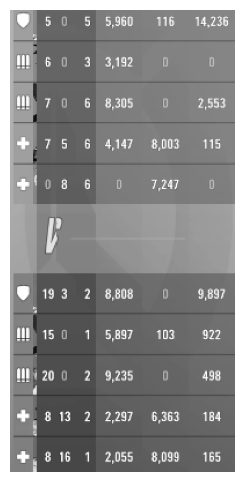

0 0 0 5 0 0 0 5 0 5 9 6 0 0 0 1 1 6 1 4 2 3 6 0 1 0 6 0 0 0 3 0 3 1 9 2 0 0 0 0 0 0 0 0 0 0 0 1 0 7 0 0 0 6 0 8 3 0 5 0 0 0 0 0 0 2 5 5 3 0 2 0 7 0 5 0 6 0 4 1 4 7 0 8 0 0 3 0 0 1 1 5 0 2 0 0 0 8 0 6 0 0 0 0 0 0 7 2 4 7 0 0 0 0 0 1 0 1 9 0 3 0 2 0 8 8 0 8 0 0 0 0 0 0 9 8 9 7 1 1 1 5 0 0 0 1 0 5 8 9 7 0 0 1 0 3 0 0 9 2 2 1 1 2 0 0 0 0 2 0 9 2 3 5 0 0 0 0 0 0 0 4 9 8 1 2 0 8 1 3 0 2 0 2 2 9 7 0 6 3 6 3 0 0 1 8 4 1 2 0 8 1 6 0 1 0 2 0 5 5 0 8 0 9 9 0 0 1 6 5


In [56]:
from pandas import CategoricalDtype, read_csv, DataFrame
import pandas as pd
from math import floor, log10
from tensorflow.data import Dataset, AUTOTUNE
from pathlib import Path
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
import tensorflow as tf
from matplotlib.pyplot import figure, axis, imshow, show

_1 = 'DEFEAT', 'DRAW', 'VICTORY'
_2 = {'TEAM': 'uint8', 'ROLE': CategoricalDtype(('TANK', 'DAMAGE', 'SUPPORT')), 'E': 'uint8', 'A': 'uint8',
      'D': 'uint8', 'DMG': 'uint16', 'H': 'uint16', 'MIT': 'uint16'}
_3 = pd.concat((read_csv(f'ROLE/{_4}.csv', index_col=0, dtype=_2) for _4 in _1), keys=_1, names=('RESULT',))
_3.dropna(inplace=True)
_5 = 1, 2
_6 = ('TANK', 1), ('DAMAGE', 2), ('SUPPORT', 2)
_7 = [_8 for _8 in _2 if _8 not in {'TEAM', 'ROLE'}]


def _9(_10):
    _11 = {_12: [] for _12 in _2}
    for _13 in _5:
        _14 = _10[_10['TEAM'] == _13]
        for _15, _16 in _6:
            for _ in range(_16 - sum(_14['ROLE'] == _15)):
                _11['TEAM'].append(_13)
                _11['ROLE'].append(_15)
                for _17 in _7:
                    _11[_17].append(0)
    return DataFrame(_11).astype(_2)


_18 = pd.concat([_3, _3.groupby(level=(0, 1), group_keys=True).apply(_9)])
_18.sort_values(['RESULT', 'INDEX', 'TEAM', 'ROLE'], inplace=True)
_19 = DataFrame()
_19['TEAM'] = _18['TEAM'] - 1
_19['ROLE'] = _18['ROLE'].cat.codes.astype('uint8')
for _20 in _7:
    for _21 in range(floor(log10(_18[_20].max())), -1, -1):
        _19[f'{_20}{_21}'] = (_18[_20] // 10 ** _21 % 10).astype('uint8')
_23 = tuple(_19.to_numpy().reshape(-1, 230).T)


def _24(_25, _26):
    _27 = decode_png(read_file(_25), 1)[230:930, 530:1370]
    return resize(tf.concat(
        (_27[:, :40], _27[:, 390:420], _27[:, 450:480], _27[:, 500:530], _27[:, 570:640], _27[:, 670:740],
         _27[:, 770:]), 1), (400, 400), preserve_aspect_ratio=True) / 255, _26


_28 = len(_23[0])
_29 = Dataset.from_tensor_slices((sorted(list(str(_30) for _30 in Path().rglob('*.png'))), _23)).map(_24,
                                                                                                     AUTOTUNE).shuffle(
    _28)
_31 = int(_28 * .9)
_32 = _29.take(_31).batch(32).prefetch(AUTOTUNE)
_33 = _29.skip(_31).batch(32).prefetch(AUTOTUNE)
for _34, _35 in _32.take(1):
    figure(figsize=(6, 6))
    axis('off')
    imshow(_34[0], cmap='gray')
    show()
    print(*(_36[0].numpy() for _36 in _35))

In [65]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
X_SHAPE = _34[0].shape
classes = _19.nunique()
int_outputs = len(_23)

In [68]:
clear_session()
inputs = Input(X_SHAPE)
conv2d = Conv2D(32, (3, 3), activation='relu')(inputs)
max_pooling2d = MaxPooling2D()(conv2d)
conv2d_1 = Conv2D(64, (3, 3), activation='relu')(max_pooling2d)
max_pooling2d_1 = MaxPooling2D()(conv2d_1)
flatten = Flatten()(max_pooling2d_1)
dense = Dense(128, 'relu')(flatten)
outputs = tuple(Dense(classes[column], 'softmax', name=f'{column}_{i}')(dense) for column in _19 for i in range(10))
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 194,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 398, 192,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 199, 96,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 197, 94,   │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 98, 47,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 294784)    │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │ 37,732,480 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_0 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_1 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_2 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_3 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_4 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_5 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_6 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_7 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_8 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TEAM_9 (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROLE_0 (Dense)      │ (None, 3)         │        387 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROLE_1 (Dense)      │ (None, 3)         │        387 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROLE_2 (Dense)      │ (None, 3)         │        387 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROLE_3 (Dense)      │ (None, 3)         │        387 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ROLE_4 (Dense)      │ (None, 3)         │        387 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 37,984,786 (144.90 MB)

 Trainable params: 37,984,786 (144.90 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile('SGD', 'sparse_categorical_crossentropy', metrics=['accuracy'] * int_outputs)
history = model.fit(
    _32,
    epochs=1000,
    verbose=0,
    callbacks=EarlyStopping(patience=10, restore_best_weights=True),
    validation_data=_33
)

2025-11-02 03:37:08.727410: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_228', 4 bytes spill stores, 4 bytes spill loads

2025-11-02 03:37:09.630342: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48487', 24 bytes spill stores, 24 bytes spill loads

2025-11-02 03:37:09.789419: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48487', 24 bytes spill stores, 24 bytes spill loads

2025-11-02 03:37:10.103726: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_457', 8 bytes spill stores, 8 bytes spill loads

2025-11-02 03:37:10.125275: I external/local

In [80]:
for X, y in _33.take(1):
    print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
(array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32), array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, 

In [ ]:
y_proba = array(model.predict()).argmax(2).reshape(10, 21)
y_proba

In [ ]:
imshow(X_valid[0], 'binary')
show()

In [ ]:
array(tuple_y_valid)[:, 0].reshape(10, 21)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout

clear_session()
input_ = Input(X_shape)
conv_2d_1 = Conv2D(64, 7, padding='same', activation='relu', kernel_initializer='HeNormal')(input_)
max_pool_2d_1 = MaxPool2D()(conv_2d_1)
conv_2d_2 = Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(max_pool_2d_1)
conv_2d_3 = Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(conv_2d_2)
max_pool_2d_2 = MaxPool2D()(conv_2d_3)
conv_2d_4 = Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(max_pool_2d_2)
conv_2d_5 = Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='HeNormal')(conv_2d_4)
max_pool_2d_3 = MaxPool2D()(conv_2d_5)
flatten = Flatten()(max_pool_2d_3)
dense_1 = Dense(128, 'relu', kernel_initializer='HeNormal')(flatten)
dropout_1 = Dropout(.5)(dense_1)
dense_2 = Dense(64, 'relu', kernel_initializer='HeNormal')(dropout_1)
dropout_2 = Dropout(.5)(dense_2)
dense_3 = [Dense(10, 'softmax', name=f'dense_3_{i}')(dropout_2) for i in range(1, int_outputs + 1)]
model = Model(inputs=input_, outputs=dense_3)
model.summary()

In [ ]:
model.compile('nadam', 'sparse_categorical_crossentropy', metrics=['accuracy'] * int_outputs)
history = model.fit(
    X_train,
    tuple_y_train,
    16,
    epochs=1000,
    verbose=0,
    callbacks=(EarlyStopping(patience=10, restore_best_weights=True), Logger()),
    validation_data=(X_valid, tuple_y_valid)
)